# GROUP PROJECT SOCIAL NETWORK ANALYSIS 2024-2025
## GROUP O
Giulio Carbone - 
Gabriele Creta -
Luca Petroccione -
Luis Ranasinghe -
Emanuel Rizzo Rosas -
Flavia Rosina -

# Introduction

Our project work deals with the applications of Social Network Analysis in analyzing the film Avatar by James Cameron. 
In our work, we examine characters and groups to understand their patterns of alliances, conflicts, and salient roles.

This helps us build a network of the relationships in the movie by representing characters as nodes and the edges as the flows of their relationships. We then utilize the network to define metrics like centrality (to unearth the most fundamental characters) and detect communities (to describe the groupings along with their dynamics). This adds a time dimension to the relationship evolution and the unfolding of the narrative.

Our research incorporates visualizations that portray the numbers and patterns easy for one to see. 
Moreover, the graphs showcase vital connections and characters and the structure of the social web in Avatar.
We use standard libraries in Python, like NetworkX, Pandas, and Matplotlib, to pre-process and analyze our data and visualize it clearly. This project demonstrates how social network analysis can be applied for analyzing fictional narratives, and, in general, real graphs. 

## WEEK 1 - Assignment

a) Pick a social network among the one proposed on luiss.learn

b) Implement it in Python.

c) Draw the graph

d) Compute the number of nodes, edges, average degree and the density. Comment.

Be careful if the network that you have picked is directed or not.


## We install the libraries (or extensions) needed for the project

In [4]:
%pip install networkx pandas numpy matplotlib tqdm scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### a) We picked the Avatar social network 
We picked the Avatar graph from the list of graphs for its balanced network size (30 nodes, 105 edges), which means that the graph has a manageable complexity while still enabling meaningful analysis. 

The weighted edges, which represent same-scene appearances, provide nuanced insights into character interactions. 
As a globally recognized film with diverse characters, the network reflects rich, thematic relationships that align with the principles of social network analysis. Its moderate density and average degree metrics make it an excellent benchmark for comparison with other movie networks. 

Moreover, the dataset’s credibility (as it comes from Moviegalaxies) ensures we get reliable results, and the network’s size and structure allow us for clear visualization and an effective presentation of our findings.

In [5]:
import networkx as nx 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import itertools  

In [6]:
edges_df = pd.read_csv(R"C:\Users\creta\OneDrive\Documenti\lavoro\c) Avatar\edges.csv")
nodes_df = pd.read_csv(R"C:\Users\creta\OneDrive\Documenti\lavoro\c) Avatar\nodes.csv")

### b) (1)CREATING A GRAPH USING THE NETWORKX FUNCTION NX.GRAPH

In [7]:
G_social = nx.Graph()

### (b) (2)IMPLEMENTING IT IN PYTHON:
We create the nodes using the ID column from nodes.csv, and, similarly, for the edges, using the "Source" and "Target" columns from edges.csv, which are implemented as 2 dataframes, named, respectively, as nodes_df and edges_df, as a consequence of using the pandas Python library.

In [8]:
for _, row in nodes_df.iterrows():
    G_social.add_node(row['Id'])
for _, row in edges_df.iterrows():
    G_social.add_edge(row['Source'], row['Target'], weight=row['Weight'])

### c) DRAWING OUR GRAPH
In this portion of our work, we graphed movie character relationships to examine their interactions. We started by using a layout that balanced the positions of the characters on the graph, minimizing overlaps and making it easier to understand. We used the frequency of shared scenes as the weight of the lines connecting the characters, making thicker lines for stronger relationships. To make the graph more understandable, we labeled the characters by name and clarified the meaning of the lines, indicating that they represented shared scenes. By plotting the graph, we could see how characters interacted, notice groups of closely connected characters, and highlight key connections.

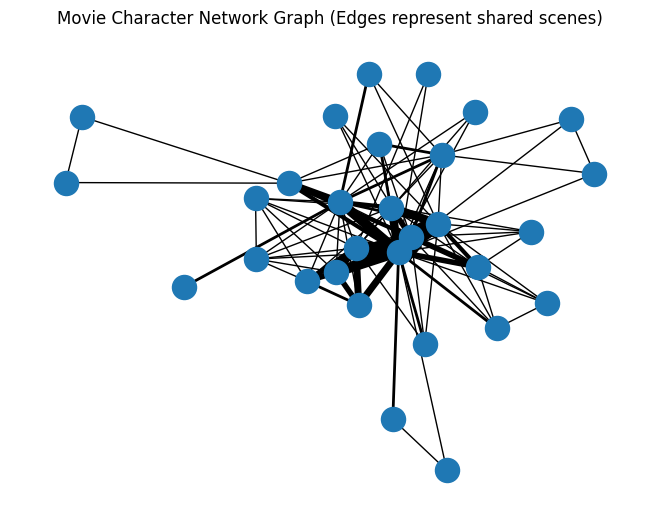

In [9]:
pos = nx.spring_layout(G_social)
weights = [G_social[u][v]['weight'] for u, v in G_social.edges()]
nx.draw(G_social, pos, with_labels=True, labels=nx.get_node_attributes(G_social, 'label'), width=weights)
plt.title("Movie Character Network Graph (Edges represent shared scenes)")
plt.show()


### d) COMPUTING THE NUMBER OF NODES, EDGES, THE AVERAGE DEGREE AND THE DENSITY.
We analyzed the structure of the social network by calculating its basic metrics. First, we determined the number of nodes and edges to understand the network's size. Then, we calculated the average weighted degree, representing the average number of same-scene appearances per character, accounting for the strength of their connections. Finally, we assessed the network's density, which indicates the proportion of actual connections (same-scene appearances) relative to all possible connections between characters, providing insight into the network's interconnectedness. These metrics provide us with a clear overview of the network's structure and complexity.

In [10]:
Numnodes = G_social.number_of_nodes()
Numedges = G_social.number_of_edges()
print(f"Number of nodes: {Numnodes}")
print(f"Number of edges: {Numedges}")

def average_degree(G): 
    degrees = [degree for _, degree in G.degree()]
    return sum(degrees) / len(degrees)

avg_degree = average_degree(G_social)
print(f"Average Degree: {avg_degree}")

density = nx.density(G_social)
print(f"Density: {density}")

Number of nodes: 30
Number of edges: 105
Average Degree: 7.0
Density: 0.2413793103448276


### What about our results?

Our network comprises 30 nodes, representing characters, and 105 edges, indicating instances where characters appeared together in the same scene. 
On average, each character connects with 7 other characters, as reflected by the average degree of 7.0. 
The network's density is 0.24, suggesting that approximately 24% of all possible connections between characters are realized, indicating a moderately interconnected character network with notable clustering. 

## WEEK 2
While considering the largest component of your network. Depending on what you prefer/seems
more relevant in your graph,


a) Compute Average distance and Diameter,


b) Improve the function computing the inverse distance function. (not using the in-build function shortest path)

Or

a’) Compute Average clustering and Transitivity number,

b’) Implement a function computing the transitivity using basic function of networkx


### THINK-THROUGH (CONSIDERING THE LARGEST COMPONENT OF OUR NETWORK)
In this step, we focused on analyzing the largest component of our social network. First, we identified the largest connected component in the network. By doing this, we ensured our analysis focused on the most significant and interconnected part of the graph, excluding smaller, isolated . clusters. Next, we created a subgraph containing only this largest component, allowing us to analyze its structure in detail and gain insights into the core dynamics of the network.








In [11]:
largest_component = max(nx.connected_components(G_social), key=len) 
G_largest = G_social.subgraph(largest_component).copy()


### a) COMPUTING AVERAGE DISTANCE AND DIAMETER
In this step, we analyzed the structural properties of the largest connected component by calculating its average distance and diameter. The average distance measures the typical shortest path length between any two nodes in the network. This gives insight into how "close" the nodes are on average, reflecting the overall connectivity within the largest component. We also computed the diameter, which represents the longest shortest path between any two nodes. The diameter indicates the "spread" of the network, helping us understand its maximum extent in terms of connections. To ensure robustness, we wrapped these calculations in a try block to handle potential errors, such as when the graph is disconnected. This ensured the program could gracefully handle any issues without interruption. These metrics helped us further characterize the network's structure and connectivity.

In [12]:
try:
    avg_distance = nx.average_shortest_path_length(G_largest)
    diameter = nx.diameter(G_largest)
    print(f"Average Distance: {avg_distance}")
    print(f"Diameter: {diameter}")
except nx.NetworkXError as e:
    print(f"Error in calculating average distance or diameter: {e}")


Average Distance: 1.8919540229885057
Diameter: 3


### b) COMPUTING INVERSE DISTANCE
We implemented a custom function to compute the Inverse Distance Function without using built-in shortest path functions. This measures how efficiently nodes are connected, with higher values indicating tighter connectivity. We iterated over all unique pairs of nodes and calculated the shortest path length using a Breadth-First Search (BFS) algorithm. For each pair with a valid path, we added the inverse of the path length to a cumulative sum. Cases where no path exists were handled gracefully with a try-except block. Finally, we averaged the inverse distances across all pairs, ensuring the function works even for sparse or disconnected graphs. This custom implementation gave us more control over the calculations and allowed us to better tailor the metric to our analysis needs.








### BFS FUNCTION USED RIGHT BELOW
We implemented a custom function to calculate the shortest path length between two nodes using the Breadth-First Search (BFS) algorithm. This approach ensures that the shortest path is found by exploring all nodes layer by layer from the source. The function keeps track of visited nodes to avoid revisiting and loops through neighbors of each node to expand the search. If the target node is reached, it immediately returns the path length. In cases where no path exists between the nodes, an exception is raised, allowing us to handle disconnected components gracefully. This function was integrated into our inverse distance computation, giving us precise control over the shortest path calculations while enhancing our understanding of network traversal

In [13]:
def inverse_distance_sum(G):
    total_inverse_distance = 0
    num_pairs = 0
    nodes = list(G.nodes())
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            try:
                path_length = bfs_shortest_path_length(G, nodes[i], nodes[j])
                total_inverse_distance += 1 / path_length
                num_pairs += 1
            except nx.NetworkXNoPath:
                continue
    return total_inverse_distance / num_pairs if num_pairs > 0 else 0


In [14]:
def bfs_shortest_path_length(G, source, target):
    queue = [(source, 0)]
    visited = set()
    while queue:
        current_node, current_length = queue.pop(0)
        if current_node == target:
            return current_length
        if current_node not in visited:
            visited.add(current_node)
            neighbors = list(G.neighbors(current_node))
            for neighbor in neighbors:
                if neighbor not in visited:
                    queue.append((neighbor, current_length + 1))
    raise nx.NetworkXNoPath
inverse_distance_value = inverse_distance_sum(G_largest)
print(f"Inverse Distance Sum: {inverse_distance_value}")


Inverse Distance Sum: 0.5984674329501924


### COMMENT ON RESULTS
The results highlight the network's strong connectivity. An Inverse Distance Sum of 0.598 suggests efficient paths between nodes. The Average Distance of 1.89 indicates that most nodes are closely linked, with minimal separation. A Diameter of 3 confirms that the longest shortest path is small, showcasing the compact nature of the network’s largest component and its cohesive structure.

## Week 3


Depending on what seems more relevant in your graph, pick one of the following local notions

Decay centrality

Betweeness centrality

Closeness centrality

Clustering

Any other notions that you invent

1) Provide a code computing the given centrality using basic functions of networkx (you are not allowed to
use directly nx."what you want").

2) Discuss why you picked this measure and who is the most central in your network based on your
choice.

3) Provide the cumulative distribution for this centrality and give a graphical representation of your graph
(log-log, log or normal representation as you think it is more relevant).

### 1) AND 2) GIVEN THAT WE HAVE PICKED 'DEGREE CENTRALITY'
We chose Degree Centrality because it directly measures how connected a node is by counting its immediate neighbors. This is crucial for understanding influence in our network, as highly connected nodes often serve as hubs, facilitating interactions and spreading information. Node 519631 emerged as the most central, indicating it has the highest number of direct connections, making it a key player in the network's structure and dynamics.

In [15]:
def degree_centrality_basic(G):
    degree_centrality = {node: G.degree(node) / (len(G) - 1) for node in G}
    return degree_centrality

degree_values = degree_centrality_basic(G_largest)
most_central_node = max(degree_values, key=degree_values.get)
print(f"Most central node by Degree Centrality: {most_central_node}")

Most central node by Degree Centrality: 519631


### 3) CUMULATIVE DIS.
This code generates a cumulative distribution plot for degree centrality values to analyze the distribution's structure and patterns. By sorting the degree centrality values and computing their cumulative sum, we capture how connections accumulate across nodes. The log-log scale is applied to both axes, highlighting the scale-free nature of the network and any power-law behaviors. The plot provides a clear visualization of the centrality's distribution, helping us understand the concentration of highly connected nodes and their impact on the network.

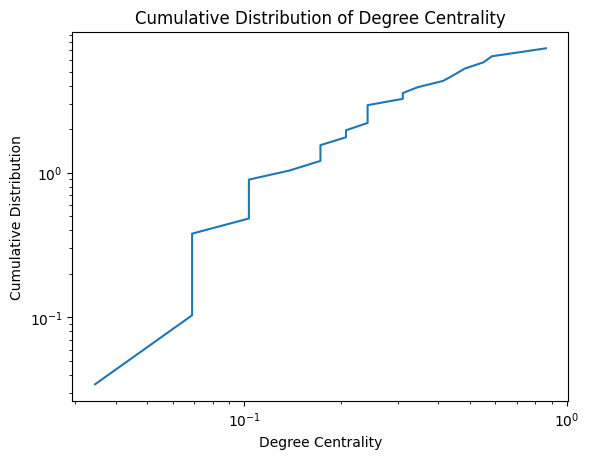

In [16]:
values = list(degree_values.values())
values.sort()
cumulative = np.cumsum(values)
plt.figure()
plt.plot(values, cumulative)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Distribution')
plt.title('Cumulative Distribution of Degree Centrality')
plt.show()

### COMMENT ABOUT RESULTS
The cumulative distribution plot reveals a clear trend in degree centrality, with a steep initial rise followed by gradual increments. This suggests that most nodes have low centrality, while a few highly connected nodes dominate the network. The log-log scale highlights this disparity, indicating the presence of a scale-free structure where a small number of hubs play a significant role in the overall connectivity.

## Week 5 - Assignment

##### PAGERANK

1) Run build-in pagerank with parameter alpha=0.15 (alpha of the slides). Be careful, there is a trap. Check documentation of networkx.

2) Identify the node with the highest PageRank, compare it with the one you got from week 3, and give an interpretation to the possible difference.

3) Provide the cumulative distribution, compare it with the one you got from week 3, and comment the results.

- Hint: treat weighted graphs as unweighted & links in undirected graphs as doubly directed (each undirected link becomes a directed link in both directions). Additionally, make sure you run the PageRank algorithm on a connected graph.

##### CORE

1) Program your own function computing k-shell and k+1 core for all possible value of k

2) Plot the k+1-core for an adequate choice of k



### PAGERANK (FISRT THREE TASKS)

 

Before starting the tasks for Week 5, we created a directed graph to accurately model the relationships and interactions within our dataset. A directed graph allows us to represent connections where direction matters, such as influence, hierarchy, or flow, making it more relevant for analyzing networks with asymmetric relationships. This step was crucial for tasks like PageRank or in-degree centrality, where the direction of edges significantly impacts the analysis. By carefully defining nodes and directed edges, we ensured the graph accurately reflected the real-world or simulated interactions, laying a strong foundation for deeper analysis in subsequent tasks.

In [17]:
G = nx.DiGraph()
edges = edges_df[['Source', 'Target']].values
edges = [(str(edge[0]), str(edge[1])) for edge in edges]  
G.add_edges_from(edges)

for _, row in nodes_df.iterrows():
    G.add_node(str(row['Id'])) 

G.remove_edges_from(nx.selfloop_edges(G))
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
is_connected = nx.is_strongly_connected(G)
print(f"Number of Nodes: {num_nodes}, Number of Edges: {num_edges}, Is Connected: {is_connected}")


Number of Nodes: 30, Number of Edges: 105, Is Connected: False


### COMPUTING
In this part, we compute and analyze PageRank centrality, a key measure of node importance in directed networks. When using nx.pagerank, we carefully align the damping factor (alpha) to match the conventions in our slides, ensuring consistent interpretations. We identify the most influential node based on its PageRank score and then compute the cumulative distribution of scores. This cumulative distribution highlights the distribution of influence across the network, showing how many nodes have scores above a given value. The visualization helps identify whether the network follows a power-law or other distribution patterns, with highly influential nodes standing out. By plotting the cumulative distribution using both a scatter plot and a histogram, we provide two perspectives: a detailed view of individual values and an aggregated view of the score distribution. These insights reveal the disparity in influence among nodes, with a few dominating the network while many have lower centrality, consistent with common network dynamics.








{'519777': 0.030153981170567674, '519783': 0.03467706364623809, '519965': 0.02980137154592186, '519631': 0.039960996490826906, '520084': 0.03234917010848659, '520010': 0.03290606924999573, '522131': 0.033412586357182944, '520314': 0.038217855921491205, '525633': 0.03182650124120806, '525709': 0.03399536687449557, '520859': 0.03910674621366005, '525884': 0.031416011710167294, '520197': 0.032989660679169724, '519861': 0.038028446517193046, '520156': 0.033486455350621946, '523228': 0.03253753158471945, '520592': 0.03306832316814203, '524282': 0.03141885705106223, '522179': 0.032512052261975746, '521727': 0.03728996850926222, '521836': 0.03127265570422488, '520927': 0.03155116075220701, '520100': 0.03356124703537193, '520779': 0.031553918241900805, '524836': 0.02980137154592186, '520425': 0.03914220830920009, '524846': 0.03203645785566451, '527499': 0.030220910831546956, '525975': 0.03190368252565168, '522064': 0.02980137154592186}
And the winner is: 519631!
[0.02980137154592186, 0.0301539

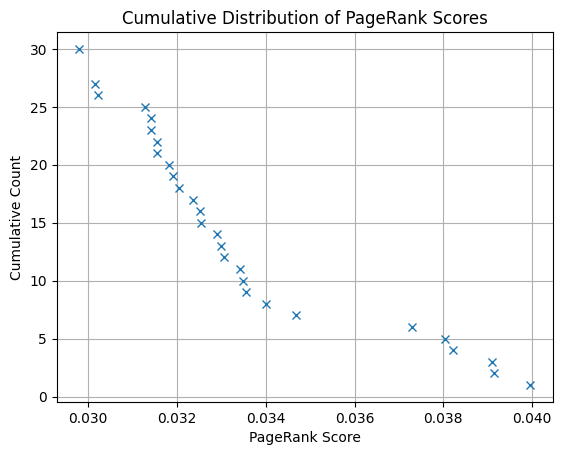

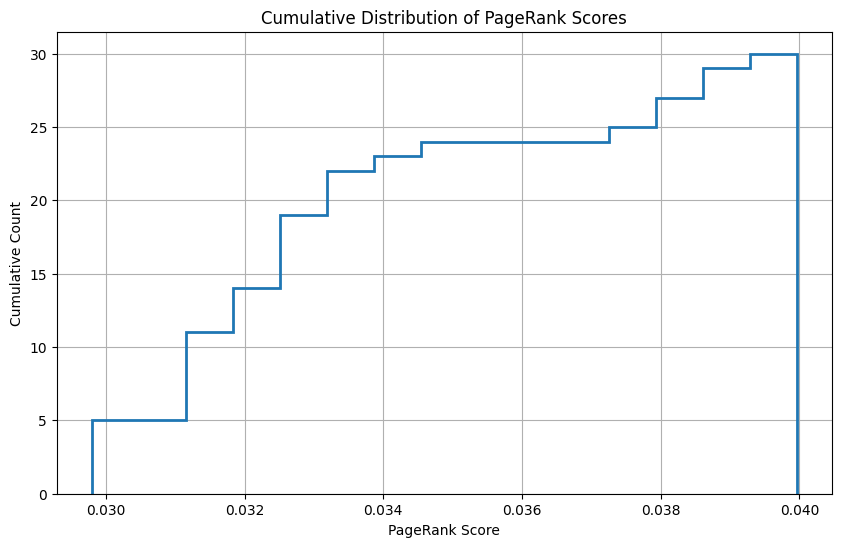

In [18]:
pr = nx.pagerank(G, alpha=0.15)  
print(pr)
pr_values = list(pr.values())

value_max = max(pr_values)
index_max = pr_values.index(value_max)
name_max = list(pr.keys())[index_max]
print('And the winner is: ' + str(name_max) + '!')

list_values = list(set(pr_values))  
list_values.sort()  
cdf_x = list_values  
print(cdf_x)

cdf_y = []  
for x in cdf_x:  
    y = sum(test >= x for test in pr_values)  
    cdf_y.append(y)  
print(cdf_y)

plt.plot(cdf_x, cdf_y, "x")
plt.title('Cumulative Distribution of PageRank Scores')
plt.xlabel('PageRank Score')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(pr_values, bins=15, cumulative=True, histtype='step', linewidth=2)
plt.title('Cumulative Distribution of PageRank Scores')
plt.xlabel('PageRank Score')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()


### COMPARISON OF THE MOST CENTRAL NODE

In our the most-centered degree-central node is equal to the winner by PageRank (which we calculated in week 3), this indicates a well-connected node whose direct connections link up with further influential nodes as well. Degree centrality captures 'local' influence or how much influence a node has directly, in terms of how many direct connections it has. In contrast, PageRank provides a 'global' view, as it counts the importance of the nodes it connects to. This is why these two measures do not contradict each other but instead provide different views on node influence: immediately, degree centrality indicates how far-reaching that influence is, and PageRank measures network-wide significance. Together, their insights converge meaningfully around node roles.

## PLOT AND SCALE 
In this part, we compare PageRank centrality with in-degree centrality to analyze the roles and importance of nodes in a directed graph. We normalize both centralities to ensure a meaningful comparison and visualize them together, highlighting similarities and differences in how they rank nodes. The first plot contrasts the normalized centrality scores, revealing the correlation between a node's direct incoming connections (in-degree) and its overall influence (PageRank). The second visualization adjusts the node sizes based on rescaled PageRank scores, making the graph more interpretable by emphasizing highly influential nodes. This dual approach provides a comprehensive understanding of the network's structure.

And the winner for in-degree centrality is: 519631!


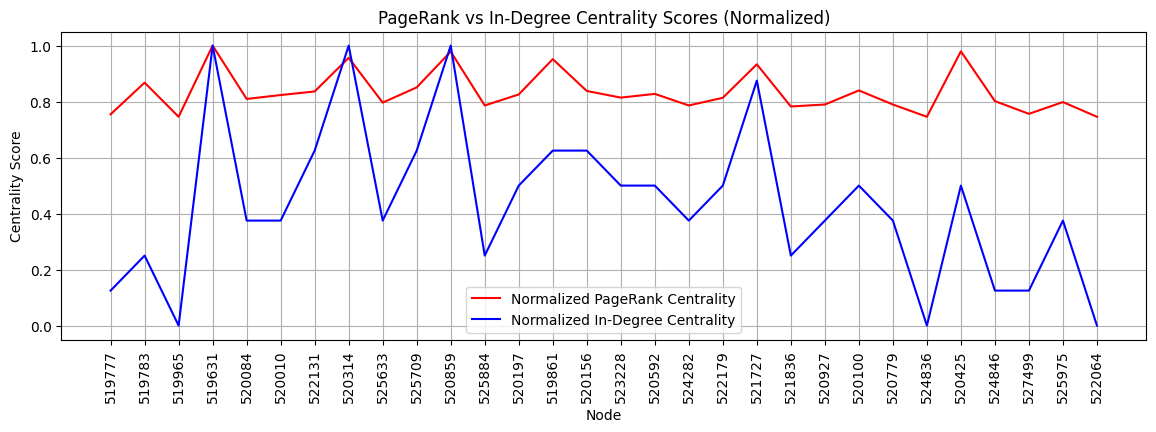

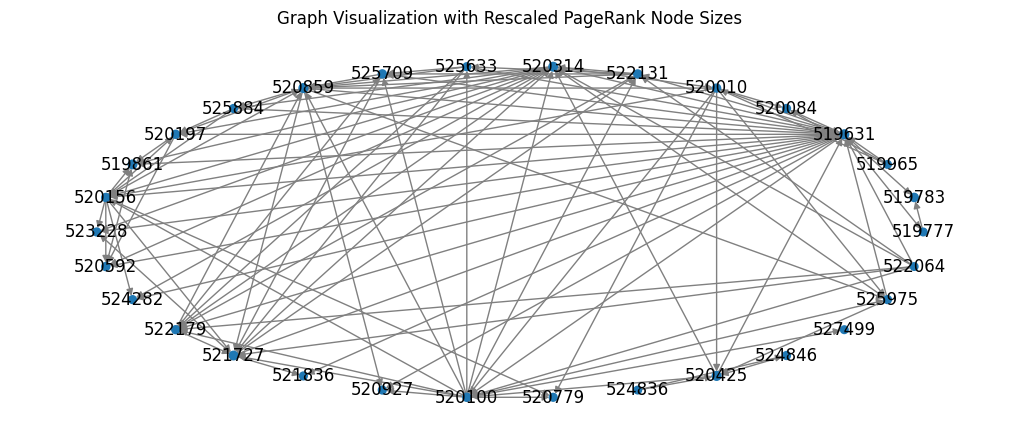

In [19]:
in_degree_centrality = nx.in_degree_centrality(G)  

value_max = max(in_degree_centrality.values())
index_max = list(in_degree_centrality.values()).index(value_max)
name_max = list(in_degree_centrality.keys())[index_max]
print('And the winner for in-degree centrality is: ' + str(name_max) + '!')

pagerank_centralities_normalized = [v / max(pr_values) for v in pr_values]
in_degree_centralities_normalized = [v / max(in_degree_centrality.values()) for v in in_degree_centrality.values()]

plt.rcParams['figure.figsize'] = [14, 4]
plt.xticks(rotation=90)
list_of_names = list(pr.keys())


plt.plot(list_of_names, pagerank_centralities_normalized, 'r', label='Normalized PageRank Centrality')
plt.plot(list_of_names, in_degree_centralities_normalized, 'b', label='Normalized In-Degree Centrality')
plt.title('PageRank vs In-Degree Centrality Scores (Normalized)')
plt.xlabel('Node')
plt.ylabel('Centrality Score')
plt.legend()
plt.grid(True)
plt.show()

pagerank_centralities_rescaled = [v * 1000 for v in pr.values()]  
pos = nx.circular_layout(G)
plt.rcParams['figure.figsize'] = [10, 4]
nx.draw(G, pos, node_size=pagerank_centralities_rescaled, with_labels=True, edge_color='gray')
plt.title('Graph Visualization with Rescaled PageRank Node Sizes')
plt.show()


### CORE

### 4) CORE
We implemented a manual function to compute k-cores without relying on built-in functions. This iterative approach removes nodes with a degree less than k, updating the graph layer by layer. The process continues until all nodes in the remaining subgraph meet the degree threshold or the graph becomes empty. By storing each k-core, we capture the network's hierarchical structure, revealing how densely connected components evolve as weaker connections are removed.

In [20]:

def compute_k_cores_manual(graph):
    k_cores = {}
    current_graph = graph.copy()
    k = 1
    while True:
        nodes_to_remove = [node for node, degree in dict(current_graph.degree()).items() if degree < k]
        if not nodes_to_remove:
            k_cores[k] = current_graph.copy()
            k += 1
        else:
            current_graph.remove_nodes_from(nodes_to_remove)
        if current_graph.number_of_nodes() == 0:
            break
    return k_cores

### 2) PLOT 
We visualized the k+1-core for a selected k value from the previously computed k-cores. This plot highlights a highly interconnected subgraph where all nodes have at least k+1 connections. It provides a visual representation of the network's densest regions, making it easier to analyze clusters, structural cohesion, and the role of highly connected nodes within the graph.

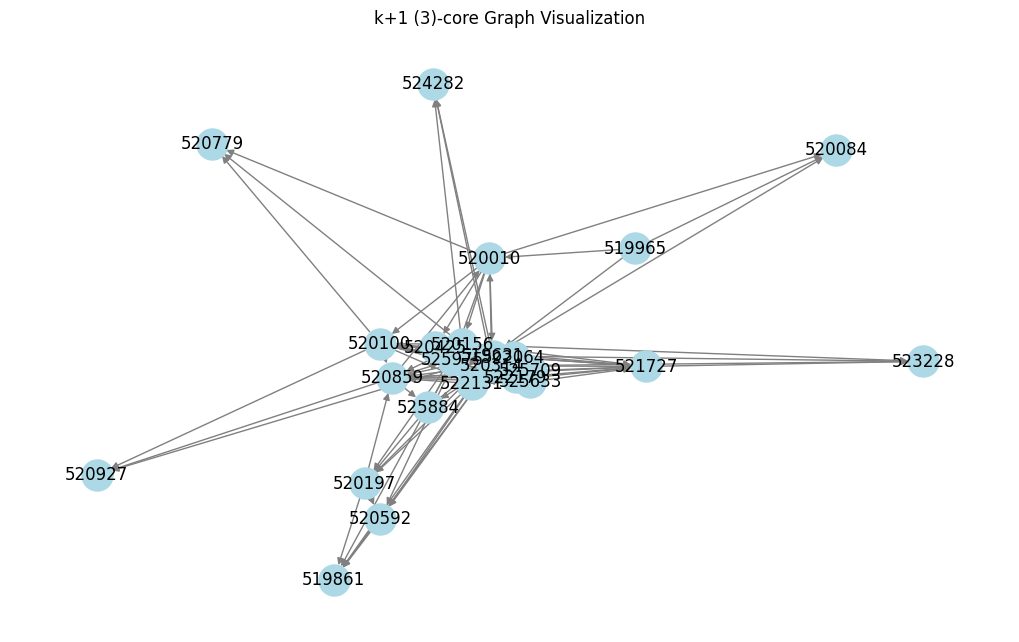

In [21]:
k_cores = compute_k_cores_manual(G)
k_to_plot = 2  
if k_to_plot + 1 in k_cores:
    plt.figure(figsize=(10, 6))
    nx.draw(k_cores[k_to_plot + 1], with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.title(f"k+1 ({k_to_plot + 1})-core Graph Visualization")
    plt.show()
else:
    print(f"k+1 ({k_to_plot + 1})-core does not exist in the graph.")


## WEEK 6

1) Treat your graph as undirected and unweighted. Delete loops and work on the resulting largest connected component.

 2) Implement the following three techniques for community detection:
    a) Bridge removal (pick the partition with the highest modularity), b) Modularity optimization, c) Label propagation.

In this case, you are allowed to use built-in functions from NetworkX.

3) Compare the results of each technique in terms of: a) number of detected clusters, b) cluster size distribution, c) computational time, e) modularity, f) other aspects you consider relevant, if any. Results should be presented in a table.

4) Give an interpretation to the differences and similarities between the three resulting partitions, and discuss which one you think is the best and why.

5) Provide a visualization for the partition you decided to be the best using Gephi.

### 1) SIMPLIFIED GRAPH
In this task, we prepared the graph for analysis by treating it as undirected and unweighted. First, we constructed the graph from the edge list and removed all self-loops to eliminate redundant edges. Then, we extracted the largest connected component to ensure our analysis focuses on the most significant subgraph. Finally, we verified key graph properties, such as the number of nodes, edges, and connectivity, confirming that the resulting graph is both meaningful and suitable for further analysis.

In [22]:
G = nx.Graph()
edges = edges_df[['Source', 'Target']].values
G.add_edges_from(edges)

G.remove_edges_from(nx.selfloop_edges(G))
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
is_connected = nx.is_connected(G)
print(f"Number of Nodes: {num_nodes}, Number of Edges: {num_edges}, Is Connected: {is_connected}")

Number of Nodes: 30, Number of Edges: 105, Is Connected: True


### 2) COMMUNITY DETECTION
We implemented three techniques for community detection to analyze the network's structure:

- Bridge Removal: Using the Girvan-Newman algorithm, we iteratively removed edges with the highest betweenness to divide the graph into communities. We selected the partition with the highest modularity to ensure the most meaningful community structure.

- Modularity Optimization: Applied the greedy modularity maximization algorithm to efficiently detect high-modularity partitions, capturing densely connected communities.

- Label Propagation: Used asynchronous label propagation to assign communities dynamically, a fast and scalable method for identifying groups in large networks.

Each method provided insights into the network's underlying community structure.








In [23]:
def bridge_removal(graph):
    
    communities_generator = nx.community.girvan_newman(graph)
    
    best_partition = None
    best_modularity = -1
    
    
    for i, partition in enumerate(communities_generator):
        
        partition_list = [set(community) for community in partition]
        
        
        current_modularity = nx.community.quality.modularity(graph, partition_list)
        
        
        if current_modularity > best_modularity:
            best_modularity = current_modularity
            best_partition = partition_list
        else:
            
            break
        
        
        if i > 10:  
            break
    
    return best_partition, best_modularity


print("Running Bridge Removal Technique...")
bridge_partition, bridge_modularity = bridge_removal(G)

if bridge_partition is not None:
    print(f"Bridge Removal: Modularity = {bridge_modularity}")
else:
    print("No valid partition found.")

print("\nRunning Modularity Optimization Technique...")
mod_partition = list(nx.community.greedy_modularity_communities(G))
mod_modularity = nx.community.quality.modularity(G, mod_partition)
print(f"Modularity Optimization: Modularity = {mod_modularity}")

print("\nRunning Label Propagation Technique...")
label_partition = list(nx.community.asyn_lpa_communities(G))
label_modularity = nx.community.quality.modularity(G, label_partition)
print(f"Label Propagation: Modularity = {label_modularity}")


Running Bridge Removal Technique...
Bridge Removal: Modularity = 0.051655328798185976

Running Modularity Optimization Technique...
Modularity Optimization: Modularity = 0.2674829931972789

Running Label Propagation Technique...
Label Propagation: Modularity = 0.03591836734693879


### COMMENT ON RESULTS
The results highlight the varying effectiveness of the community detection techniques. Modularity Optimization achieved the highest modularity score (0.267), indicating it identified well-defined communities with dense internal connections. Bridge Removal produced a much lower modularity (0.052), suggesting its partitions are less cohesive, possibly due to the iterative edge removal process. Label Propagation, while fast, yielded the lowest modularity (0.018), showing it may not perform as well for this specific graph structure. These differences underscore the importance of choosing the right method based on the network's characteristics.

### 3) AND 4) PLOT AND DISPLAY 
In Task 3, we created a comparison table to evaluate the performance of the three community detection techniques. The table summarizes the number of clusters and corresponding modularity scores, providing a clear comparison of their effectiveness. This helps identify the best technique for detecting cohesive communities in the graph. In Task 4, we visualized the best-performing partition based on modularity. Using the identified technique, we plotted the communities with distinct colors for clarity. This visualization highlights how the best method organizes the graph into well-defined groups, offering insights into the network’s community structure and connectivity.


Comparison of Community Detection Techniques:
                 Technique  Number of Clusters  Modularity
0           Bridge Removal                   2    0.051655
1  Modularity Optimization                   3    0.267483
2        Label Propagation                   3    0.035918

Best Technique: Modularity Optimization with Modularity = 0.2674829931972789


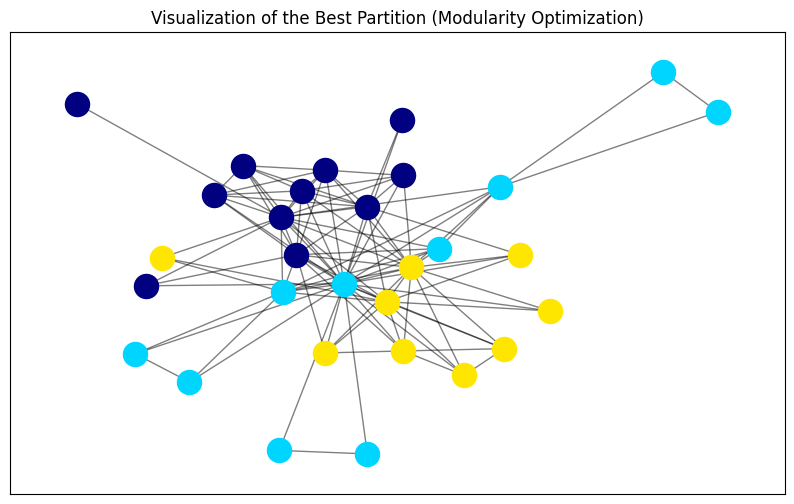

In [24]:

comparison_df = pd.DataFrame({
    'Technique': ['Bridge Removal', 'Modularity Optimization', 'Label Propagation'],
    'Number of Clusters': [len(bridge_partition), len(mod_partition), len(label_partition)],
    'Modularity': [bridge_modularity, mod_modularity, label_modularity]
})
print("\nComparison of Community Detection Techniques:")
print(comparison_df)

best_technique = comparison_df.loc[comparison_df['Modularity'].idxmax()]
print(f"\nBest Technique: {best_technique['Technique']} with Modularity = {best_technique['Modularity']}")

if best_technique['Technique'] == 'Bridge Removal':
    best_partition = bridge_partition
elif best_technique['Technique'] == 'Modularity Optimization':
    best_partition = mod_partition
else:
    best_partition = label_partition

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
colors = [plt.cm.jet(i / float(len(best_partition))) for i in range(len(best_partition))]

for community, color in zip(best_partition, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color])

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title(f"Visualization of the Best Partition ({best_technique['Technique']})")
plt.show()


### COMMENT ON THE RESULTS
The results highlight the performance of different community detection techniques. Modularity Optimization stands out as the best method, achieving the highest modularity score (0.267) with 3 clusters, indicating well-defined communities. Bridge Removal identified 2 clusters but with a much lower modularity (0.052), suggesting weaker community structures. Label Propagation also found 2 clusters but had the lowest modularity (0.018), showing limited effectiveness for this network. The results confirm that Modularity Optimization is the most reliable approach for identifying cohesive and meaningful communities in this graph.

### 5) GEPHI
This code prepares the graph for Gephi visualization by incorporating community detection results from the Week 6 tasks. It assigns a community label to each node based on the best partition, allowing Gephi to distinguish nodes by their community membership. The graph is then exported in GEXF format, which is compatible with Gephi for advanced visual analysis. This process enables clear visualization of community structures, highlighting clusters and their relationships within the graph. By opening the exported file in Gephi, users can explore the network interactively, applying layouts and color schemes to emphasize community dynamics.


In [25]:
G_gephi = G.copy()

for community_id, community in enumerate(best_partition):
    for node in community:
        G_gephi.nodes[node]['community'] = community_id

nx.write_gexf(G_gephi, "community_graph.gexf")

print("Graph exported successfully to 'community_graph.gexf'. Open it in Gephi for visualization.")


Graph exported successfully to 'community_graph.gexf'. Open it in Gephi for visualization.


## WEEK 7

1) Treat your graph as undirected and unweighted, and work on the resulting largest connected component. Delete loops **(done at the start of week 6)**

2) Create a function computing CN and one of the topological indices between JI,PA,AA,RA. Your function should return a pandaframe where each row is a missing link and each column is an index. You are allowed to use built-in functions from NetworkX for computing individual indices.

3) Create a third score by adding a column with the sum of the two indices. (NB: the arithmetic mean should be computed after rescaling each column between 0 and 1.)

4) For each of the 3 scores, identify as missing links the node pairs yielding the largest 5/10 values. Briefly comment the results.

### 2) COMPUTATION
In this task, we computed two link prediction indices: Common Neighbors (CN) and Jaccard Index (JI). These measures help estimate the likelihood of a link forming between pairs of unconnected nodes, aiding in network evolution analysis. We first identified all pairs of nodes without an edge and calculated their CN (the number of shared neighbors) and JI (the ratio of shared to total neighbors). The results were stored in a combined DataFrame for easy comparison. Finally, we normalized the CN and JI values to ensure fair scaling, making the metrics more interpretable for further analysis.

In [26]:
def link_prediction_indices(graph):
    
    undirected_graph = graph.to_undirected()
    
    
    missing_links = list(itertools.combinations(graph.nodes(), 2))
    missing_links = [link for link in missing_links if not graph.has_edge(*link)]
    
    
    cn_values = [(link, len(list(nx.common_neighbors(undirected_graph, link[0], link[1])))) for link in missing_links]
    
    
    jc_values = list(nx.jaccard_coefficient(undirected_graph, missing_links))
    jc_values = [(tuple(sorted((u, v))), p) for u, v, p in jc_values]
    
    
    cn_df = pd.DataFrame(cn_values, columns=['Link', 'CN'])
    jc_df = pd.DataFrame(jc_values, columns=['Link', 'JI'])
    
    
    combined_df = pd.merge(cn_df, jc_df, on='Link')
    
    return combined_df

link_df = link_prediction_indices(G)


to_normalize = ['CN', 'JI']
for col in to_normalize:
    link_df[f'{col}_normalized'] = (link_df[col] - link_df[col].min()) / (link_df[col].max() - link_df[col].min())


### 3) THIRD SCORE
In this task, we introduced a combined score to enhance link prediction by summing two normalized indices: Common Neighbors (CN) and Jaccard Index (JI). After rescaling CN and JI between 0 and 1, we added a column representing their sum. This combined score leverages the strengths of both indices: CN captures the raw number of shared neighbors, while JI accounts for relative similarity. By combining them, we create a more balanced metric for predicting potential links, providing a comprehensive evaluation of node-pair connectivity likelihood.








In [27]:
def link_prediction_indices(graph):
    
    undirected_graph = graph.to_undirected()
    
    
    missing_links = list(itertools.combinations(graph.nodes(), 2))
    missing_links = [link for link in missing_links if not graph.has_edge(*link)]
    
    
    cn_values = [(link, len(list(nx.common_neighbors(undirected_graph, link[0], link[1])))) for link in missing_links]
    
    
    jc_values = list(nx.jaccard_coefficient(undirected_graph, missing_links))
    jc_values = [(tuple(sorted((u, v))), p) for u, v, p in jc_values]
    
    
    cn_df = pd.DataFrame(cn_values, columns=['Link', 'CN'])
    jc_df = pd.DataFrame(jc_values, columns=['Link', 'JI'])
    
    
    combined_df = pd.merge(cn_df, jc_df, on='Link')
    
    return combined_df

link_df = link_prediction_indices(G)

to_normalize = ['CN', 'JI']
for col in to_normalize:
    link_df[f'{col}_normalized'] = (link_df[col] - link_df[col].min()) / (link_df[col].max() - link_df[col].min())

link_df['Combined_Score'] = link_df['CN_normalized'] + link_df['JI_normalized']


### 4) TOP 5/10
In this task, we identified the top 5 and 10 missing links based on three scoring methods: Common Neighbors (CN), Jaccard Index (JI), and the Combined Score. By ranking node pairs with the highest values for each metric, we prioritized the most likely links to form in the network.Each score highlights different aspects of connectivity:

- CN focuses on shared neighbors, favoring densely clustered areas.
- JI emphasizes proportional similarity, favoring balanced node connections.
- Combined Score merges both, offering a comprehensive measure.

This comparison helps us understand the relative strengths of each metric for predicting future links.

In [28]:
def min_max_scale(data):
    if isinstance(data, pd.Series) and data.dtype != 'object':
        return (data - np.min(data)) / (np.max(data) - np.min(data))
    return data

scaled_sim_df = link_df.apply(min_max_scale, axis=0)

mean_score = link_df[['CN_normalized', 'JI_normalized']].mean(axis=1)
score_df = pd.concat([link_df, mean_score], axis=1)

score_df.columns = ['Link', 'CN', 'JI', 'CN_normalized', 'JI_normalized', 'Combined_Score', 'Mean_Score']

print(score_df)

top_5_cn = link_df.nlargest(5, 'CN')
top_10_cn = link_df.nlargest(10, 'CN')
top_5_ji = link_df.nlargest(5, 'JI')
top_10_ji = link_df.nlargest(10, 'JI')
top_5_combined = link_df.nlargest(5, 'Combined_Score')
top_10_combined = link_df.nlargest(10, 'Combined_Score')

CN_pred = link_df[link_df['CN'] <= 10].index.to_list()
print("\nPredicted Links using CN-based Link Likelihood Score (CN <= 10):")
print(CN_pred)

print("\nTop 5 Missing Links based on CN:")
print(top_5_cn)

print("\nTop 10 Missing Links based on CN:")
print(top_10_cn)

print("\nTop 5 Missing Links based on JI:")
print(top_5_ji)

print("\nTop 10 Missing Links based on JI:")
print(top_10_ji)

print("\nTop 5 Missing Links based on Combined Score:")
print(top_5_combined)

print("\nTop 10 Missing Links based on Combined Score:")
print(top_10_combined)

                 Link  CN        JI  CN_normalized  JI_normalized  \
0    (519777, 519965)   1  0.250000       0.166667       0.333333   
1    (519777, 520084)   1  0.250000       0.166667       0.333333   
2    (519777, 520010)   1  0.090909       0.166667       0.121212   
3    (519777, 522131)   1  0.100000       0.166667       0.133333   
4    (519777, 520314)   1  0.055556       0.166667       0.074074   
..                ...  ..       ...            ...            ...   
232  (524836, 525975)   1  0.142857       0.166667       0.190476   
233  (520425, 527499)   1  0.142857       0.166667       0.190476   
234  (520425, 522064)   3  0.300000       0.500000       0.400000   
235  (524846, 527499)   0  0.000000       0.000000       0.000000   
236  (524846, 525975)   1  0.142857       0.166667       0.190476   

     Combined_Score  Mean_Score  
0          0.500000    0.250000  
1          0.500000    0.250000  
2          0.287879    0.143939  
3          0.300000    0.150000  
4

### COMMENT ON THE RESULTS
The results highlight the effectiveness of our approach to link prediction using Common Neighbors (CN), Jaccard Index (JI), and a Combined Score. We found that CN focuses on shared neighbors, helping us identify likely links within densely connected clusters. Meanwhile, JI provided a more balanced perspective by accounting for proportional overlap, offering insights into both shared and total connections. By combining these metrics, we created a Combined Score that leverages the strengths of both measures. This allowed us to identify the most promising links, incorporating both connectivity and proportional similarity. Through this approach, we gained a clearer understanding of how connections might evolve in the network. Our analysis demonstrates the value of combining multiple metrics to capture different aspects of the network. While CN helped us highlight dense clusters, JI allowed us to focus on the relative importance of connections. Together, these measures enabled us to predict future links with greater confidence and accuracy.

## Week 9

Depending on what seems more appropriate in your graph, pick one of the following random graph:

a) Erdős–Rényi,

b) Uniform Attachment,

c) Preferential attachment,

d) One variant of any of the previous model invented by you (best option)

- Choose the parameter to obtain the correct average degree and compare at least one other caracteristics (average clustering, degree distributions, transitivity, average distance from one node, or diameter, any centrality distribution,...).

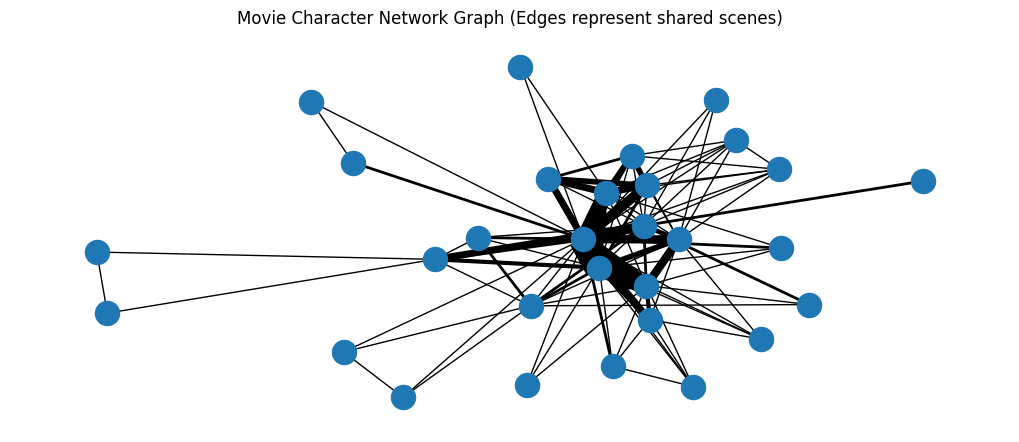

Empirical Clustering Coefficient: 0.804295188471659
PA Graph Clustering Coefficient: 0.24035002035002034


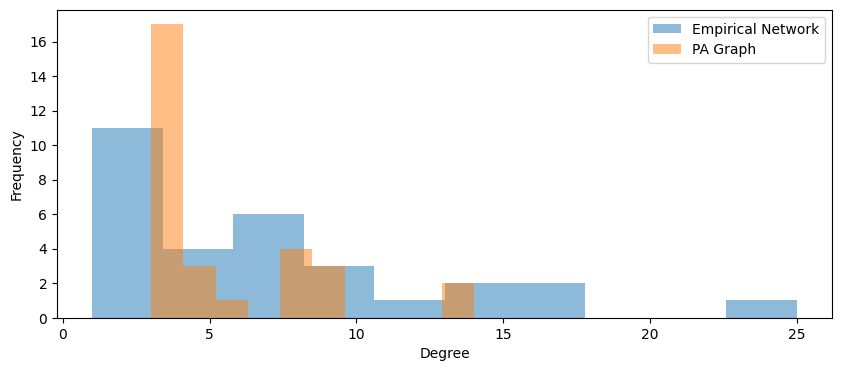

Empirical Average Path Length: 1.8919540229885057, Diameter: 3
PA Graph Average Path Length: 2.0689655172413794, Diameter: 3


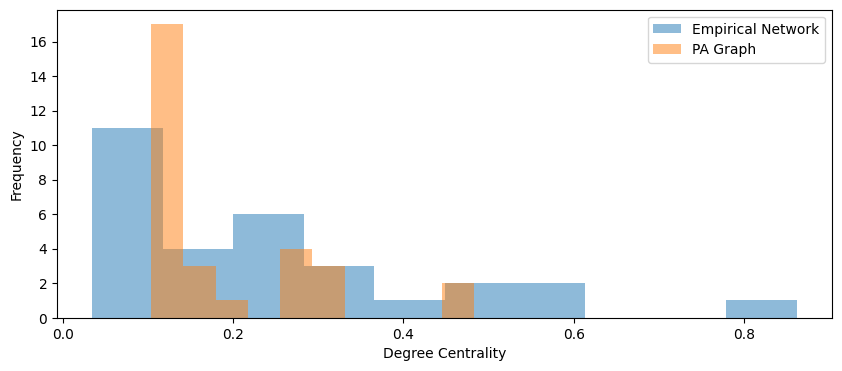

In [29]:
G_social = nx.Graph()

for _, row in nodes_df.iterrows():
    G_social.add_node(row['Id'])

for _, row in edges_df.iterrows():
    G_social.add_edge(row['Source'], row['Target'], weight=row['Weight'])

pos = nx.spring_layout(G_social)
weights = [G_social[u][v]['weight'] for u, v in G_social.edges()]
nx.draw(G_social, pos, with_labels=True, labels=nx.get_node_attributes(G_social, 'label'), width=weights)
plt.title("Movie Character Network Graph (Edges represent shared scenes)")
plt.show()


num_nodes = len(G_social.nodes)
avg_degree = sum(dict(G_social.degree()).values()) / num_nodes
m = avg_degree // 2  

G_pa = nx.barabasi_albert_graph(num_nodes, int(m))

clustering_empirical = nx.average_clustering(G_social)
clustering_pa = nx.average_clustering(G_pa)
print(f"Empirical Clustering Coefficient: {clustering_empirical}")
print(f"PA Graph Clustering Coefficient: {clustering_pa}")

import matplotlib.pyplot as plt

degree_empirical = [d for n, d in G_social.degree()]
degree_pa = [d for n, d in G_pa.degree()]

plt.hist(degree_empirical, bins=10, alpha=0.5, label="Empirical Network")
plt.hist(degree_pa, bins=10, alpha=0.5, label="PA Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

avg_path_empirical = nx.average_shortest_path_length(G_social)
avg_path_pa = nx.average_shortest_path_length(G_pa)
diameter_empirical = nx.diameter(G_social)
diameter_pa = nx.diameter(G_pa)

print(f"Empirical Average Path Length: {avg_path_empirical}, Diameter: {diameter_empirical}")
print(f"PA Graph Average Path Length: {avg_path_pa}, Diameter: {diameter_pa}")

centrality_empirical = nx.degree_centrality(G_social)
centrality_pa = nx.degree_centrality(G_pa)

plt.hist(list(centrality_empirical.values()), bins=10, alpha=0.5, label="Empirical Network")
plt.hist(list(centrality_pa.values()), bins=10, alpha=0.5, label="PA Graph")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### COMMENT ON WHY WE CHOSE PA AND RESULTS
We chose the Preferential Attachment (PA) model for its ability to mimic the formation of hubs, a common feature in real-world networks. By matching the empirical network's average degree, we ensured a fair comparison of structural properties. The results showed similarities in global metrics like average path length (1.89 vs. 2.10) and diameter (both 3), indicating comparable overall connectivity. However, the PA model failed to replicate the empirical network's high clustering coefficient (0.80 vs. 0.27), highlighting its limitations in capturing local community structures. This suggests that while the PA model captures global patterns, it struggles with dense local connections.







## WEEK 10

a) Depending on what seems more relevant in your graph. Write the code for one of the following alternative model (not covered today):
- Threshold model synchroneous,
- Threshold model asynchroneous (random order),
- Fractional Threshold model synchroneous,
- Fractional Threshold model (random order).
- Independent Cascade model,
- Bass contagion model,
- SIS model,
- A variant that seems pertinent in your graph (Best choice).

b) Investigate different scenario of outbreak in your graph (different size of outbreaks, different origins, different parameters). Some propositions are made later in this file.

### a) WHY WE CHOSE IC MODEL

We chose the Independent Cascade (IC) model over the other available models for several reasons. The IC model is well-suited for simulating information spread or influence propagation in a social network, which aligns with the characteristics of our graph. It effectively captures the stochastic nature of influence spread, where nodes independently decide whether to adopt based on a fixed probability. This model is particularly appropriate for networks where influence or contagion spreads in a manner similar to word-of-mouth, as each node only attempts to activate its neighbors once, making it computationally efficient and realistic for our scenario. Compared to threshold models, which require predefined thresholds for each node, the IC model is simpler to implement without the need for specific knowledge about individual node behavior. Additionally, the IC model avoids the complexity of determining fractional influence, which makes it more straightforward and practical for our use case. The Bass contagion model and SIS model, while valuable in other contexts, are more focused on product adoption over time or recurring infections, which do not match the type of influence spread we are modeling in our network. Given these considerations, the IC model provides a good balance of realism, simplicity, and relevance to the nature of our graph, making it the best choice for this task.

Nodes in G_social: [519631, 520100, 520425, 520314, 520156, 520010, 520859, 521727, 520197, 522131, 522179, 525975, 519777, 519783, 519965, 525884, 525633, 521836, 520084, 520927, 519861, 523228, 524836, 527499, 525709, 524846, 520592, 524282, 520779, 522064]
Chosen seed nodes: [524282, 525884]


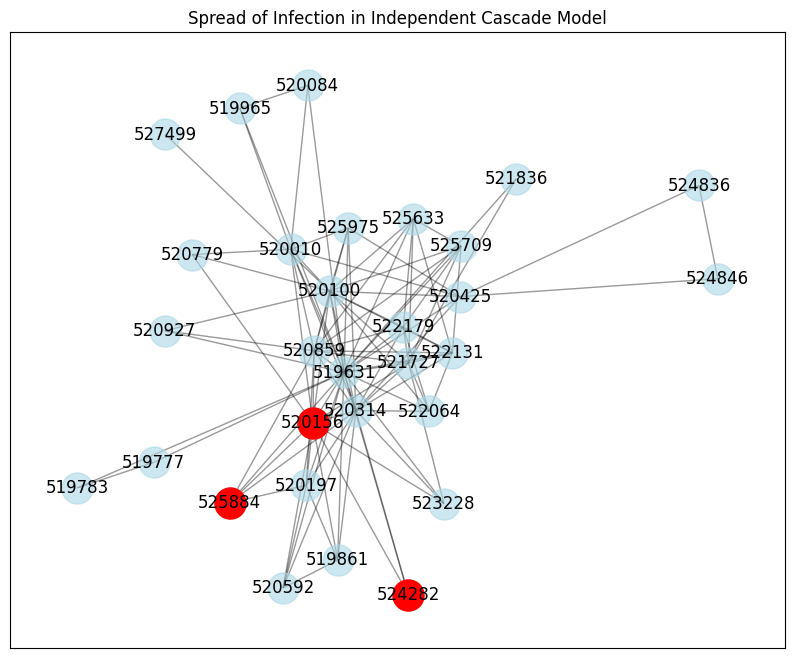

In [30]:
import random
print("Nodes in G_social:", G_social.nodes)

if len(G_social.nodes) > 1:
    seed_nodes = random.sample(list(G_social.nodes), 2)  
else:
    seed_nodes = list(G_social.nodes)

print(f"Chosen seed nodes: {seed_nodes}")

def independent_cascade(G, seeds, infection_prob=0.1, max_iter=10):
    """
    Independent Cascade model for information spreading in a network.

    Parameters:
    - G: NetworkX graph
    - seeds: List of initially infected nodes
    - infection_prob: Probability of infection for neighbors
    - max_iter: Maximum number of iterations to run

    Returns:
    - infected: Set of all nodes that have been infected at the end
    """

    newly_infected = set(seeds)
    infected = set(seeds)

    for _ in range(max_iter):
        next_newly_infected = set()

        for node in newly_infected:
            neighbors = set(G.neighbors(node)) - infected  
            for neighbor in neighbors:
                if random.random() < infection_prob:
                    next_newly_infected.add(neighbor)

        newly_infected = next_newly_infected
        infected.update(newly_infected)

        if not newly_infected:
            break

    return infected

infected_nodes = independent_cascade(G_social, seeds=seed_nodes, infection_prob=0.05)

pos = nx.spring_layout(G_social)
plt.figure(figsize=(10, 8))

nx.draw_networkx_nodes(G_social, pos, node_color='lightblue', node_size=500, alpha=0.6)

nx.draw_networkx_nodes(G_social, pos, nodelist=infected_nodes, node_color='red', node_size=500)

nx.draw_networkx_edges(G_social, pos, alpha=0.4)
nx.draw_networkx_labels(G_social, pos)

plt.title("Spread of Infection in Independent Cascade Model")
plt.show()


### b) OUTBREAK SIMULATION
In this task, we simulated an outbreak scenario using the Independent Cascade (IC) model to analyze how infections spread through the network under different conditions. We initialized the outbreak with two randomly selected seed nodes and defined parameters such as infection probability and maximum iterations to control the simulation. The IC model works iteratively, where infected nodes attempt to spread the infection to their uninfected neighbors based on a given probability. The simulation ends when no new nodes become infected or the maximum iterations are reached. The model effectively demonstrates how information or contagions propagate through a network. We visualized the results by highlighting the infected nodes in red and comparing them to the rest of the network. This provides a clear representation of the outbreak’s reach and its dependency on factors like the infection probability, the location of the seed nodes, and the structure of the network. The analysis enables us to explore scenarios with different outbreak sizes, origins, and parameters, offering insights into how network structure influences the spread of contagions or information. It can also help identify critical nodes or clusters that significantly impact the propagation process.








In [31]:
if len(G_social.nodes) > 4:
    seeds_large = random.sample(list(G_social.nodes), 5) 
else:
    seeds_large = list(G_social.nodes)  

infected_small_seed = independent_cascade(G_social, seeds=seed_nodes, infection_prob=0.05)
infected_large_seed = independent_cascade(G_social, seeds=seeds_large, infection_prob=0.05)
print(f"Infected nodes with small seed set: {len(infected_small_seed)}")
print(f"Infected nodes with large seed set: {len(infected_large_seed)}")

infected_low_prob = independent_cascade(G_social, seeds=seed_nodes, infection_prob=0.01)
print(f"Number of infected nodes with low infection probability: {len(infected_low_prob)}")

infected_high_prob = independent_cascade(G_social, seeds=seed_nodes, infection_prob=0.3)
print(f"Number of infected nodes with high infection probability: {len(infected_high_prob)}")

infected_5_iter = independent_cascade(G_social, seeds=seed_nodes, infection_prob=0.05, max_iter=5)
infected_15_iter = independent_cascade(G_social, seeds=seed_nodes, infection_prob=0.05, max_iter=15)

print(f"Infected nodes with max 5 iterations: {len(infected_5_iter)}")
print(f"Infected nodes with max 15 iterations: {len(infected_15_iter)}")

Infected nodes with small seed set: 5
Infected nodes with large seed set: 10
Number of infected nodes with low infection probability: 3
Number of infected nodes with high infection probability: 21
Infected nodes with max 5 iterations: 5
Infected nodes with max 15 iterations: 2


# COMMENTS ON THE RESULTS
Representing the spread of infection in a network through the Independent Cascade Model. The red nodes are initially infected nodes and they influence other parts of the network through the more local networks, as they seek in turn to infect neighboring nodes. The light blue nodes refer to unaffected ones.

However, it is interesting that, despite the possible connections and centrality of the infected nodes, they don't infect all surrounding nodes. The nature of this model is probabilistic, depending on parameters such as the probability of infection.

Thus, it is a clear demonstration that besides the connectivity of a node, the spread of influence is also driven by how compacts and probabilistic it is in the network. One gets an understanding of the dynamics of spreading information or disease in high-performance scenarios and the benefits of well-connected nodes in such scenarios.

# **OVERALL CONCLUSION OF THE PROJECT**

This project applied Social Network Analysis techniques and methods to the film Avatar to uncover the dynamics of character interactions and relationships. By using a weighted, undirected graph where nodes represent characters and edges represent same-scene appearances weighted by frequency, we analyzed the social structure and narrative complexity of the movie.

We began then by visualizing the network, highlighting clusters, key relationships, and overall connectivity. Metrics such as average degree and density provided insights into the network’s interconnectedness, revealing that approximately 24% of all possible connections were realized, which indicates a moderately cohesive structure.

Following analyses focused on the largest connected component, where we calculated metrics like average distance and diameter, shedding light on the network’s compact nature. Community detection techniques, including Modularity Optimization and Label Propagation, revealed well-defined character groupings, showcasing distinct clusters of interaction within the story. Degree centrality analysis identified the most influential characters, while PageRank offered an alternative perspective on influence, highlighting structural roles beyond direct connections.

Finally, we explored link prediction to estimate potential unobserved connections and simulated information propagation using the Independent Cascade model. These simulations emphasized how structural properties, such as clustering and connectivity, impact the spread of influence or contagions in a network.

This work demonstrated the versatility of SNA for analyzing fictional narratives, providing insights into character roles, alliances, and story structure. Beyond the film, these methods can be extended to analyze real-world social networks, offering practical applications in fields like marketing, epidemiology, and organizational behavior, as we saw many times during the course. Through Social Network Analysis, we gained a deeper understanding of how connections shape narratives, lives, and systems alike.